In [196]:
from IPython.display import display, HTML 
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
 """))

<span style="color:green; font-size: 30px; font-weight: bold;"> 4절. 복사와 뷰 </span>
    
## 4.1 할당

In [2]:
import numpy as np

In [3]:
a = np.arange(6)
a

array([0, 1, 2, 3, 4, 5])

In [6]:
b = a

In [7]:
#a와 b가 같은 객체인지 확인하는 방법
a is b

True

In [12]:
b.shape = (2,-1)
b

array([[0, 1, 2],
       [3, 4, 5]])

In [13]:
a #a의 값도 바뀜

array([[0, 1, 2],
       [3, 4, 5]])

## 4.2 뷰(view)
- 슬라이싱할 경우 자동 view생성

In [14]:
c = np.arange(12).reshape(2,-1)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [16]:
d = c.view() #view c의 복제본으로 만듬(얕은 복사)
d is c #c객체와 d객체가 같은지 확인하는 방법

False

In [17]:
id(c), id(d)

(3090618593328, 3090606997104)

In [20]:
c == d #주소는 다르나 c와 d의 내용이 같음을 확인함

array([[ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True]])

In [21]:
np.all(c==d) #주소는 다르나 c와 d의 내용이 같음을 확인함

True

In [22]:
#d를 변경하면? c도 바뀔까?
d.shape = (3,4)  #d의 구조를 바꿈
d

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [23]:
c #원본이 바뀌지 않았음. 

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [24]:
#d의 데이터를 0번 방의 짝수 인덱스만 바꾸기
d[0,::2] = -99
d

array([[-99,   1, -99,   3],
       [  4,   5,   6,   7],
       [  8,   9,  10,  11]])

In [25]:
c #c의 값도 같이 변하는 얕은 복사됨

array([[-99,   1, -99,   3,   4,   5],
       [  6,   7,   8,   9,  10,  11]])

In [28]:
# 슬라이싱이 될 때 자동 view가 반환이 됨
c = np.arange(12).reshape(2,6)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [29]:
d = c[:,:-1] #독립변수 제외하고 불러옴
d

array([[ 0,  1,  2,  3,  4],
       [ 6,  7,  8,  9, 10]])

In [31]:
# d[-1,-1] = 99
d[...,-1] = 99 #슬라이싱을하면 원본도 억세스되어서 바뀜
d

array([[ 0,  1,  2,  3, 99],
       [ 6,  7,  8,  9, 99]])

## 4.3 깊은 복사

In [37]:
c = np.arange(12).reshape(2,6)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [39]:
d = c[:,:-1].copy()
d[...,-1] = 99
d

array([[ 0,  1,  2,  3, 99],
       [ 6,  7,  8,  9, 99]])

In [40]:
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

# 5절. 고급인덱싱
## 5.1 인덱스 배열로 인덱싱

In [41]:
a = np.arange(12)**2
a

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121])

In [45]:
a[[0,0,0,1,5]] #[0,0,1,5]리스트로 만들수 있지만 배열로도 만들 수 잇음

array([ 0,  0,  0,  1, 25])

In [46]:
# 인덱싱 하기 위한 값을 배열로 만들기
i = np.array([0,0,1,5])
a[i]

array([ 0,  0,  1, 25])

In [47]:
# 인덱싱 하기 위한 값을 2차원 배열로 만들기
# 이미지 딥러닝할때 쓰임

j = np.array([[0,0],
             [1,5]])
a[j]

array([[ 0,  0],
       [ 1, 25]])

In [90]:
palette = np.array([[116, 116, 116],           #black
                    [255, 178, 245],           #red 
                    [183, 240, 177],           #green
                    [178, 204, 255],           #blue
                    [255, 255, 255]])          #white

In [91]:
palette[[[4, 0],
         [0, 4]]]

array([[[255, 255, 255],
        [116, 116, 116]],

       [[116, 116, 116],
        [255, 255, 255]]])

In [92]:
image_index = np.array([[4,4,4,0,0,0,0,4,4,4],
                        [4,0,0,4,4,4,4,0,0,4],
                        [0,0,4,4,4,4,4,4,0,0],
                        [0,4,4,1,4,4,3,4,4,0],
                        [0,4,4,1,4,4,3,4,4,0],
                        [0,4,4,4,4,4,4,4,4,0],
                        [0,4,2,2,4,4,2,2,4,0],
                        [4,0,4,2,2,2,2,4,0,4],
                        [4,4,0,4,4,4,4,0,4,4],
                        [4,4,4,0,0,0,0,4,4,4]])

In [93]:
image_data = palette[image_index]

In [95]:
image_data.ndim #차원 확인 .3차원

3

In [96]:
image_data.shape

(10, 10, 3)

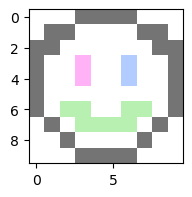

In [99]:
from matplotlib import pyplot as plt
plt.figure(figsize=(2,2))
plt.imshow(image_data)
# %matplotlib inline
# plt.imshow(image_data, interpolation='nearest')
plt.show()

## 5.2 논리 배열을 이용한 인덱싱

In [100]:
a = np.array([0,1,10,11,12,13,14,15,16,99])
a 

array([ 0,  1, 10, 11, 12, 13, 14, 15, 16, 99])

In [101]:
a%2==0

array([ True, False,  True, False,  True, False,  True, False,  True,
       False])

In [103]:
#논리배열 (배열과 데이터 프레임에서만 가능!)
# a [[ True,False,True,False,True,False,True,False,True,False]]
a [a%2==0]

array([ 0, 10, 12, 14, 16])

In [104]:
#a에서 12보다 큰 값만 출력
a[a>12]

array([13, 14, 15, 16, 99])

# 6절. 선형대수
- 2차원 넘파이배열을 행렬 \
    **행렬곱   : @,dot(),단위행렬** \
    **역행렬   : np.linalg.inv(행렬) : 역행렬@행렬 = 단위행렬** \
    ※정방행렬일때 역행렬을 구할 수 있음, 행수와 열수가 같을때  \
    **전치행렬 : 행렬.T/행렬.transpose()**

In [107]:
# 역행렬 구하기(정방행렬일때 구할 수 있음)
a = np.array([[1,2],
              [3,4]])
a

array([[1, 2],
       [3, 4]])

In [110]:
# a의 역행렬 : a의 역행렬 @a = a@a의 역행렬 => 단위행렬이 된다.
np.linalg.inv(a)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [111]:
np.linalg.inv(a) @ a

array([[1.0000000e+00, 4.4408921e-16],
       [0.0000000e+00, 1.0000000e+00]])

## 6.1 선형 연립 방정식 풀기 (독립변수1, 데이터2)

In [9]:
import numpy as np
x = np.array([2,4]) #독립변수
Y = np.array([40,60]) #종속변수 : 내가 알아맞추고 싶은 변수
X = np.column_stack((x, np.ones(len(x))))
X, X.shape

(array([[2., 1.],
        [4., 1.]]),
 (2, 2))

In [30]:
Y = np.array([40,60])
Y

array([40, 60])

In [31]:
# X @ xb = Y
# X의 역행렬 @ X @ wb = X의 역행렬 @ Y
# wb = X의 역행렬 @ Y

wb = np.linalg.inv(X) @ Y
wb

array([10., 20.])

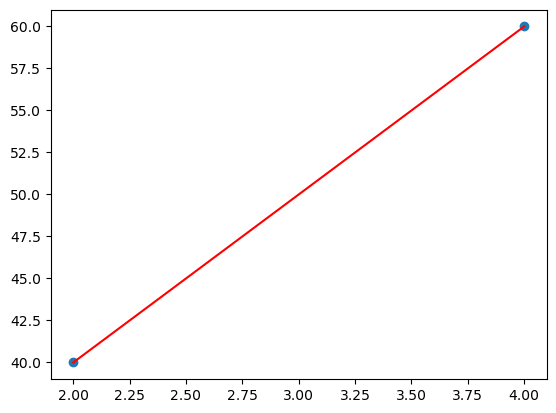

In [33]:
import matplotlib.pyplot as plt
plt.scatter(x,Y)
plt.plot(x,10*x+20, 'r')
plt.show()

In [35]:
np.linalg.solve(X,Y) #w(기울기), b(Y절편)을 구하는 함수

array([10., 20.])

## 6.2 선형 연립 방정식 풀기(회귀분석)_독립변수 1개, 데이터 n개

In [ ]:
# #회귀분석
# 한 변수(X)가 변할 때, 다른 변수(Y)는 어떻게 변할까?"
# X: 독립변수 (원인, 설명 변수)
# Y: 종속변수 (결과, 예측 대상)

In [4]:
import numpy as np
x = np.array([32, 64, 96, 118, 126, 144, 152.5, 158])
X = np.c_[x, np.ones(len(x))]
X #정방행렬이 아님

array([[ 32. ,   1. ],
       [ 64. ,   1. ],
       [ 96. ,   1. ],
       [118. ,   1. ],
       [126. ,   1. ],
       [144. ,   1. ],
       [152.5,   1. ],
       [158. ,   1. ]])

In [6]:
# np.lingalg.inv(X) X가 정방행렬이 아니면 역행렬을 구할 수 없음

In [ ]:
#X의 역행렬 @ X @ wb = X의 역행렬 @ Y

In [ ]:
Y = np.array([18, 24, 61.5, 49, 52, 105, 130.3, 125])

In [10]:
X.T ,X.transpose()#행이랑 열을 맞바꿔주는 .T / transpose() 전치행렬

(array([[ 32. ,  64. ,  96. , 118. , 126. , 144. , 152.5, 158. ],
        [  1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ]]),
 array([[ 32. ,  64. ,  96. , 118. , 126. , 144. , 152.5, 158. ],
        [  1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ]]))

In [11]:
X_ = X.T @ X
X_

array([[1.1309225e+05, 8.9050000e+02],
       [8.9050000e+02, 8.0000000e+00]])

In [12]:
#X가 정방행렬이 아닐 경우 , X.T @ X로 정방행렬을 만든 후 역행렬을 곱한다.
np.linalg.inv(X_) @ X_

array([[1.00000000e+00, 1.38777878e-17],
       [0.00000000e+00, 1.00000000e+00]])

In [ ]:
xW + b = y

In [22]:
x = np.array([32, 64, 96, 118, 126, 144, 152.5, 158])
y = np.array([18, 24, 61.5, 49, 52, 105, 130.3, 125])
X = np.c_[(x, np.ones(len(x)))]
Y = y.reshape(-1,1)
X,Y

(array([[ 32. ,   1. ],
        [ 64. ,   1. ],
        [ 96. ,   1. ],
        [118. ,   1. ],
        [126. ,   1. ],
        [144. ,   1. ],
        [152.5,   1. ],
        [158. ,   1. ]]),
 array([[ 18. ],
        [ 24. ],
        [ 61.5],
        [ 49. ],
        [ 52. ],
        [105. ],
        [130.3],
        [125. ]]))

In [23]:
#               X @ wb = Y
#      X.T @ X @ wb = X.T @ Y
#      _______
#         (X_) 
#(X.T @ X)의 역행렬 @ X.T @ X @ wb = (X.T @ X)의 역행렬 @ X.T @ Y
#       X_의 역행렬 @ X_ @ wb = X_의 역행렬 @ X.T @ Y
wb = np.linalg.inv(X.T @ X) @ X.T @ Y
wb

array([[  0.87493126],
       [-26.79078617]])

In [27]:
print(wb[0,0], wb[1,0]) #기울기와 Y절편
y_hat = wb[0,0] * x + wb[1,0] #예측값을 구하기(f=y_hat) / 실제값이랑 차이가 많이 남
print('독립변수 :', x)
print('종속변수 :', y)
print('예측값 :', y_hat)

0.8749312625981291 -26.79078616795418
독립변수 : [ 32.   64.   96.  118.  126.  144.  152.5 158. ]
종속변수 : [ 18.   24.   61.5  49.   52.  105.  130.3 125. ]
예측값 : [  1.20701424  29.20481464  57.20261504  76.45110282  83.45055292
  99.19931565 106.63623138 111.44835332]


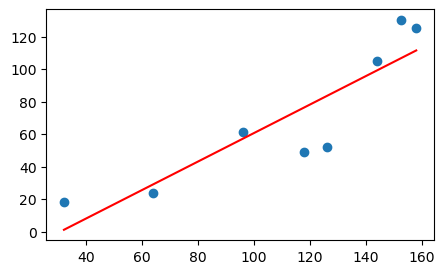

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
plt.scatter(x, y)
plt.plot(x, y_hat, 'r')
plt.show()

# 7절. 연습문제
## 실습형

In [51]:
#데이터셋은 딕셔너리 스타일로 출력
import numpy as np
iris = datasets.load_iris()
# iris.keys() iris의 키값만 출력
iris_data = iris.data

In [46]:
#씨본은 데이터 프레임 스타일로 출력
import seaborn as sns 
iris_df = sns.load_dataset('iris')
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [54]:
type(iris_data), iris_data.dtype, iris_data.shape #150행 4열짜리 float64 배열

(numpy.ndarray, dtype('float64'), (150, 4))

In [76]:
# 1.각 변수별 평균을 출력하세요.
import numpy as np
a = np.array([5.84333333, 3.05733333, 3.758,1.1993333])
print('평균값 : ', np.mean(a))


평균값 :  3.46449999


In [177]:
# 2.처음 다섯개 행을 출력하세요.
x = np.array([[5.1,3.5,1.4,0.2],
              [4.9,3.,1.4,0.2],
              [4.7,3.2,1.5,0.2],
              [4.6,3.1,1.5,0.2],
              [5.,3.6,1.4,0.2]])
x[:1:]
iris_data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [182]:
# 3.처음 다섯개 행에서 마지막 열을 제외한 나머지열을 출력하세요.
x = np.array([[5.1,3.5,1.4,0.2],
              [4.9,3.,1.4,0.2],
              [4.7,3.2,1.5,0.2],
              [4.6,3.1,1.5,0.2],
              [5.,3.6,1.4,0.2]])
# x[:1,:3] 
x[:5,-1]

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [173]:
# 4.처음 다섯개 행에서 마지막 열만 출력하세요.
z = np.array([0.2,0.2,0.2,0.2,0.2])
z[4:]
z_ = z[4:].reshape(1,1)
z_

array([[0.2]])

In [136]:
# 5. 3번 배열과 4번 배열을 원래 모양이 되도록 합치세요. 실행결과는 2번의 결과와 같아야 합니다. 
# x = array([[5.1, 3.5, 1.4]]) / y = array([0.2])
x1, z_
c = np.hstack((x1,z_))
c

array([[5.1, 3.5, 1.4, 0.2]])

In [ ]:
#리스트에 내용이 다 같은지 확인할때는 all함수 / 넘파이 비교는 np.all

In [187]:
# answers - [answer1, answer2, answer3, answer4, answer5]
# np.all(answer1 == answer1)
# np.all(answer1 == answer2)
# np.all(answer1 == answer3)
# np.all(answer1 == answer4)
# np.all(answer1 == answer5)
# all(np.all(answer1 == answer)for answer in answers)

#다 같은 값인지 확인하기 위한 함수 만들기
def same_all(*answers): 
    if len(answers)>0:
        first = answers[0]
        return all(np.all(first == answer)for answer in answers)
    else:
        return False

In [194]:
#선생님 풀이

sample = iris_data[:5].copy()
# print(sample)
sample[sample > np.mean(sample, axis=0)]

array([5.1, 3.5, 4.9, 1.5, 5. , 3.6])

In [195]:
np.where(sample > np.mean(sample, axis=0),sample, None) #None 결측치(타입:실수(float))

array([[5.1, 3.5, None, None],
       [4.9, None, None, None],
       [None, None, None, None],
       [None, None, 1.5, None],
       [5.0, 3.6, None, None]], dtype=object)

In [162]:
# 6.처음 다섯 개 행을 이용해서 각 열 별로 평균보다 큰 값들만 출력하세요.
x = np.array([[5.1,3.5,1.4,0.2],
              [4.9,3.,1.4,0.2],
              [4.7,3.2,1.5,0.2],
              [4.6,3.1,1.5,0.2],
              [5.,3.6,1.4,0.2]])

print('열별 합 :', x.sum(axis=0))
xlist = x.sum(axis=0) #평균값을 xlist에 넣고
c = np.mean(x,axis=0) #c는 평균값
print('평균 값 :', c)
temp = [] #평균보다 큰 값들을 넣을 리스트

for idx in range(x.shape[1]):  #첫번째에 
    for row in range(x.shape[0]): #첫 행이
        if x[row, idx] > c[idx]:  # 값이 평균보다 크다면 
            temp.append(x[row, idx]) # temp에 추가 
            
print('평균보다 큰 값들:', temp)

열별 합 : [24.3 16.4  7.2  1. ]
평균 값 : [4.86 3.28 1.44 0.2 ]
평균보다 큰 값들: [5.1, 4.9, 5.0, 3.5, 3.6, 1.5, 1.5]


In [163]:
import numpy as np
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [ ]:
# 연습문제(풀이형)
# Q1. [12,15,18,21]
# Q2. 1(1차원),2,3,4
# Q3. a[:2]
# Q4. [1,0,3,0,0]
# Q5.np.c_[a,b]